## Linear Regression Bike Sharing Assignment
### Problem Statement 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
### Goal                                                  
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

### Importing Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading and Understanding Data 

In [111]:
#Reading Data
df = pd.read_csv("day.csv")
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [112]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [113]:
# Checking size of the data
df.shape

(730, 16)

In [114]:
#Checking the detailed info of Bike data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [115]:
#Describe the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning 

In [116]:
# Check the Null Values 
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [117]:
# Dropping columns that are not useful for analysis
# Dropping dteday column as Year,Month,Weeday columns capture same data 
# Dropping instant column as its not significant for analysis
# Dropping casual column and Registered columns as 'Cnt' is sum of these

df.drop(['dteday', 'instant','casual', 'registered'], axis=1, inplace=True)


In [120]:
# Verifying data after dropping columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Updating Categorical variables with values from data definition

In [121]:
#Replacing variables season, month, weathersit, weekday

# season (1:spring, 2:summer, 3:fall, 4:winter)
df['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)

# mnth (1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec')
df['mnth'].replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}, inplace = True)

# weekday (0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat')
df['weekday'].replace({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}, inplace = True)

# weathersit (1:'clear', 2:'cloudy', 3:'drizzle', 4:'rainy')
df['weathersit'].replace({1:'clear', 2:'cloudy', 3:'drizzle', 4:'rainy'}, inplace = True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [122]:
# Check the count of unique values of the columns
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

## Visualising the Numerical column Data
Visualising the data to see whether the data is suitable for linear regression or not as well to understand the relation between the features/columns

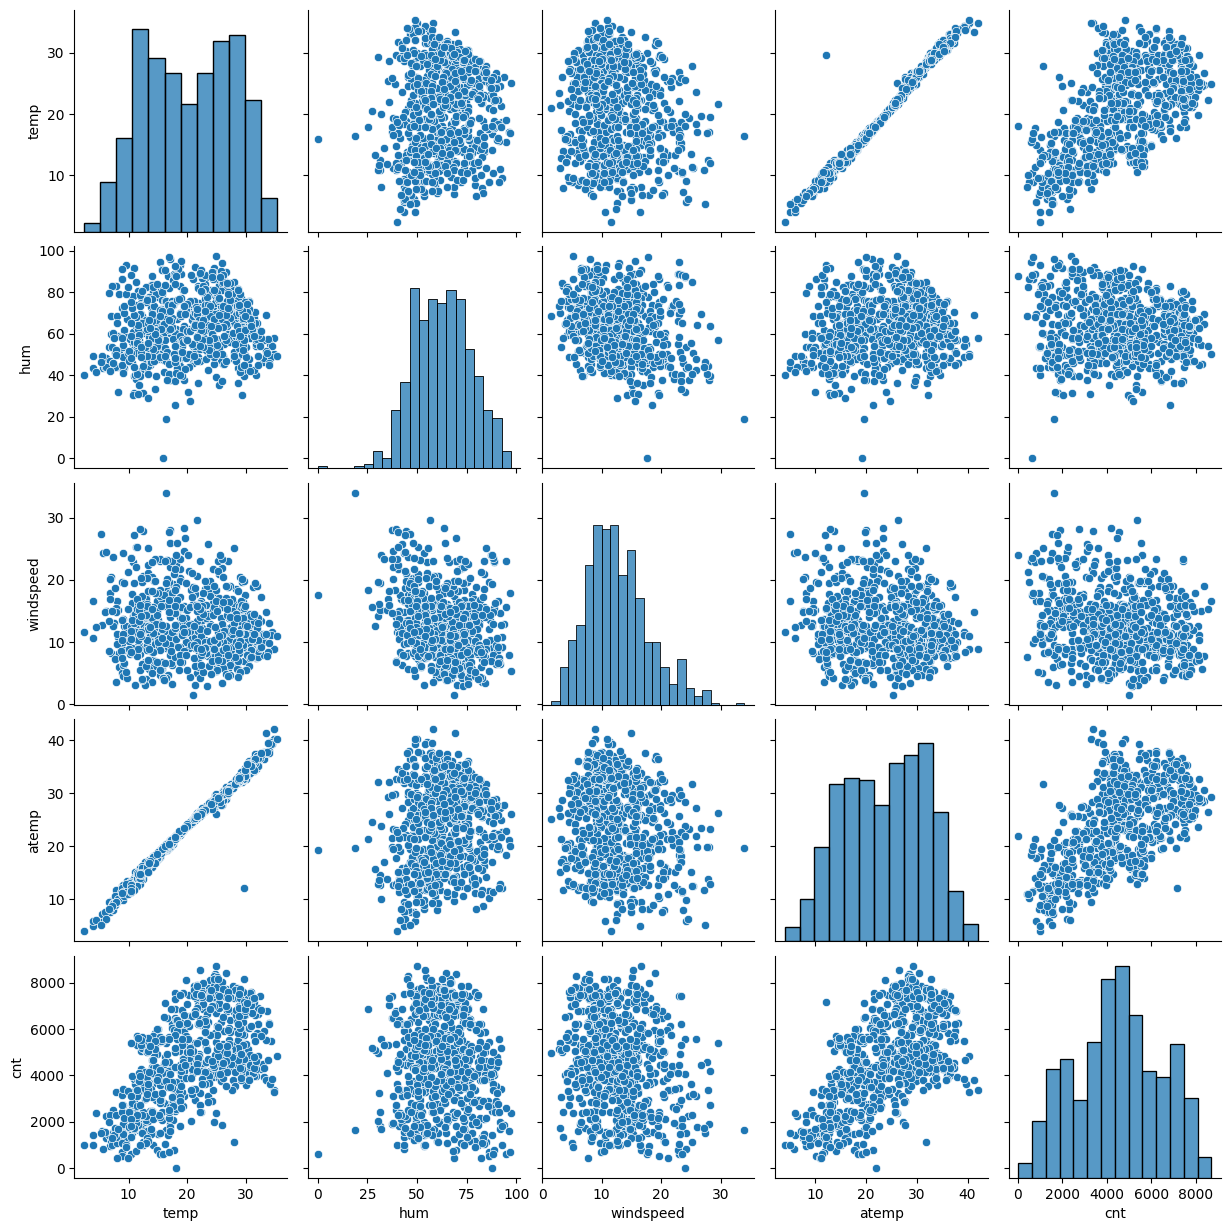

In [125]:
# ploting the pairplot for all the numeric columns in the dataset
sns.pairplot(df[['temp','hum', 'windspeed', 'atemp','cnt']])
plt.show()

In [126]:
#Printing the Stats of dataset
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


We can observe that cnt has a Linear relationship with some features
So, the dataset is suitable for the linear regression

## Visualising the Categorical Columns
Based on the data definition, below are the columns related to categories
1. season
2. workingday
3. month
4. year
5. holiday
6. weekday
7. weathersit

Now we can plot the boxplot for these categorical variable against the bikes cnt column

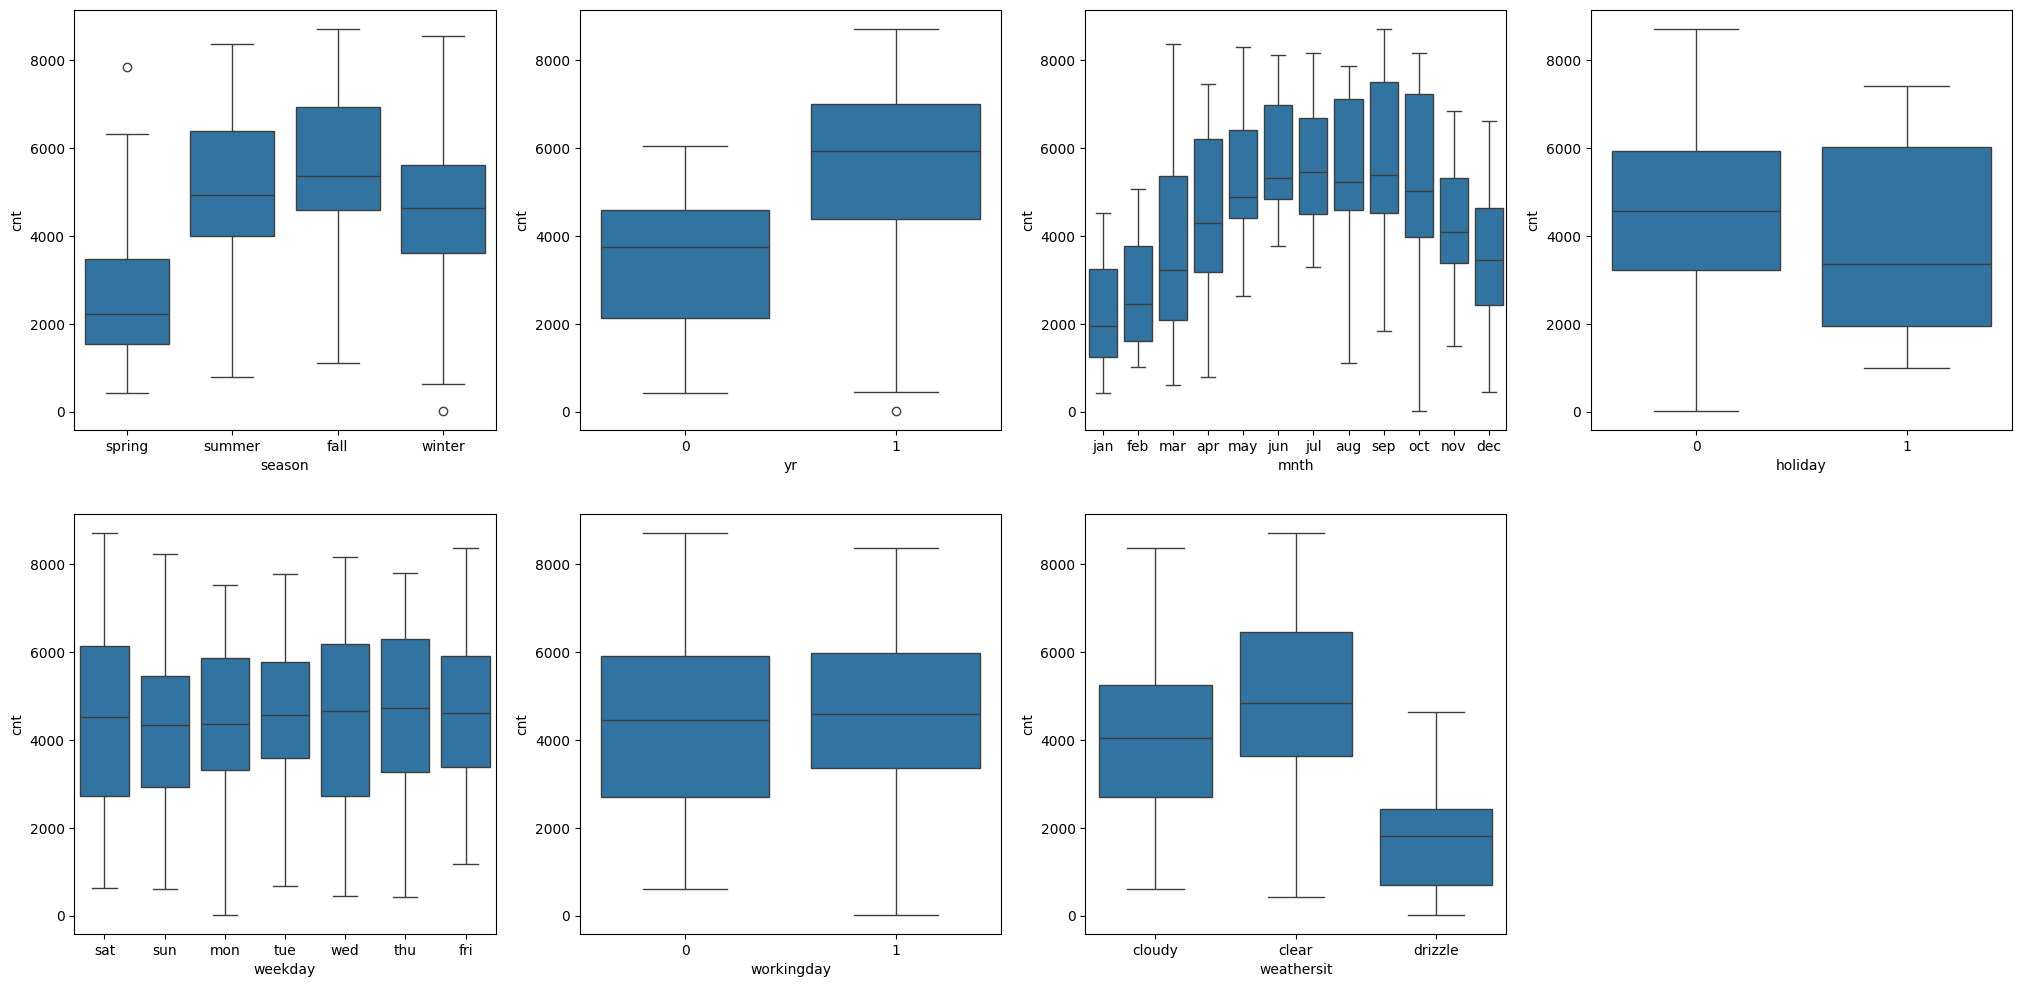

In [127]:
plt.figure(figsize=(25, 12))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

Below are the observations of the above boxplots,

1. Rental bikes are taken more on Falls season compare to other seasons and low in Spring season
2. More rental bikes are taken in  2019 compare to 2018
3. Between June to October we have high rental bikes
4. Similar For both working day and non-working day
5. For all weekdays, rental bikes have same median value
6. Holidays has fewer rental bikes compare to non-holiday
7. During clear day we can see more rental bikes , Less in Drizzle and zero in Heavy rain

### Preparing the data for modelling
All the columns with binary critera(0/1) are already in binary format.

Convert the categorical variables to dummy variables

Splitting the Bike dataframe between Train and Test data (70:30)


In [128]:
# Get the dummy variables for the features 'season', 'mnth', 'weekday', 'weathersit'
df = pd.get_dummies(data=df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True, dtype=int)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_drizzle
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [129]:
#Checking the Rows and columns after creating dummies 
df.shape

(730, 30)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   atemp               730 non-null    float64
 5   hum                 730 non-null    float64
 6   windspeed           730 non-null    float64
 7   cnt                 730 non-null    int64  
 8   season_spring       730 non-null    int32  
 9   season_summer       730 non-null    int32  
 10  season_winter       730 non-null    int32  
 11  mnth_aug            730 non-null    int32  
 12  mnth_dec            730 non-null    int32  
 13  mnth_feb            730 non-null    int32  
 14  mnth_jan            730 non-null    int32  
 15  mnth_jul            730 non-null    int32  
 16  mnth_jun

In [131]:
# Splitting the Bike dataframe between Train and Test data (70:30)
np.random.seed(0)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

In [132]:
#Print the shapes of split data
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(730, 30)
(511, 30)
(219, 30)


In [133]:
# printing the stats of the training dataset
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_drizzle
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,20.106483,23.499390,63.109443,12.833686,4491.303327,0.242661,0.246575,...,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.344423,0.029354
std,0.500412,0.157613,0.468042,7.424445,8.083052,14.142965,5.286912,1953.413860,0.429112,0.431440,...,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.475645,0.168963
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.649576,16.634475,52.291650,9.041918,3123.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.260847,24.115200,63.416700,12.124789,4539.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.208350,15.750595,6008.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rescaling the Features
Based on the above stats we can observe that all the columns data is not spread across the same range
To keep all the feature in same range for better interpretation, using Min-Max Scaler (normalization)

In [134]:
# Feature scaling of the Train data: MinMaxScaling
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']] = scaler.fit_transform(df_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
#Recheck the data
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_drizzle
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


In [135]:
# printing the stats of the training data post scaling
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_drizzle
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.514186,0.242661,0.246575,...,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.344423,0.029354
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.224737,0.429112,0.431440,...,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.475645,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.356765,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.519673,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.688737,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we can see that, all the features max value is 1 and min is 0
All the values are spread between 0 to 1

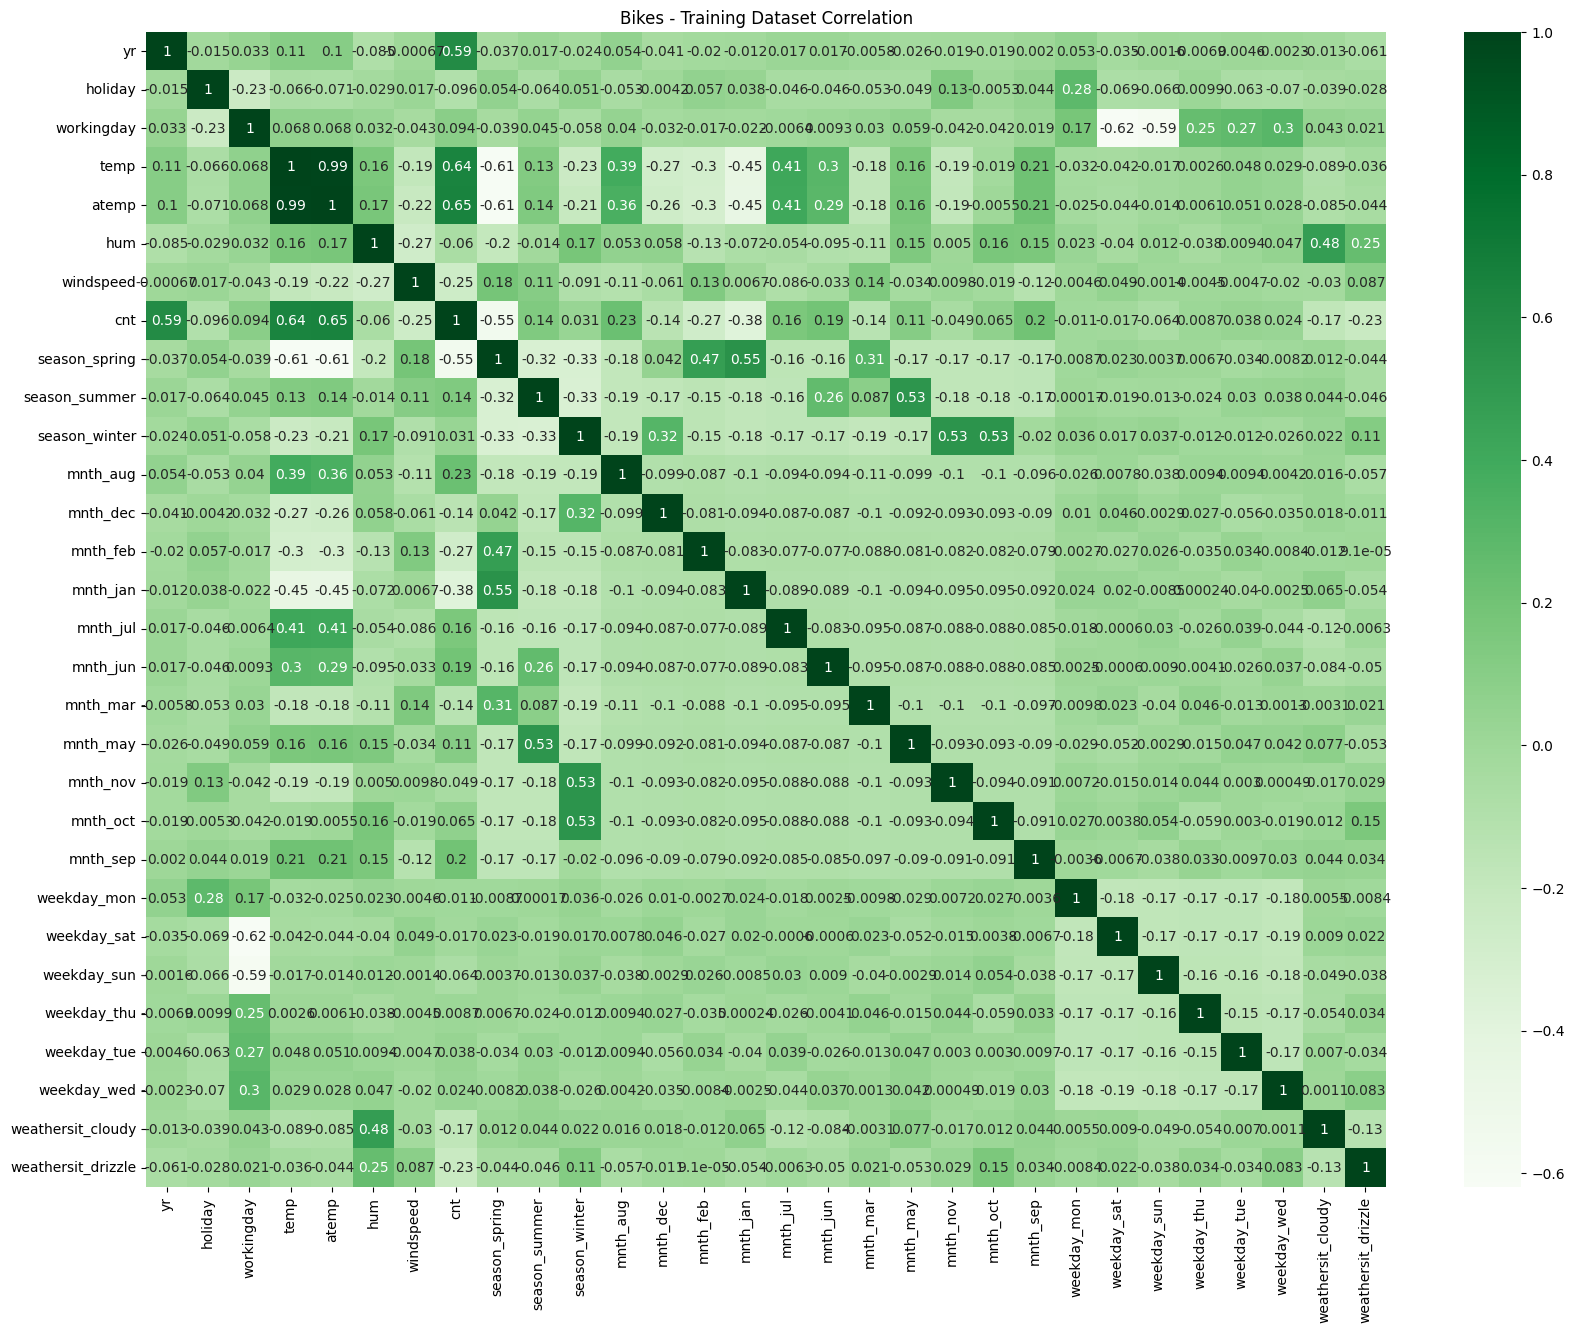

In [136]:
#Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.title('Bikes - Training Dataset Correlation')
plt.show()

Its observed that yr, temp, atemp are much correlated to cnt. Lets check the pairplot of these 


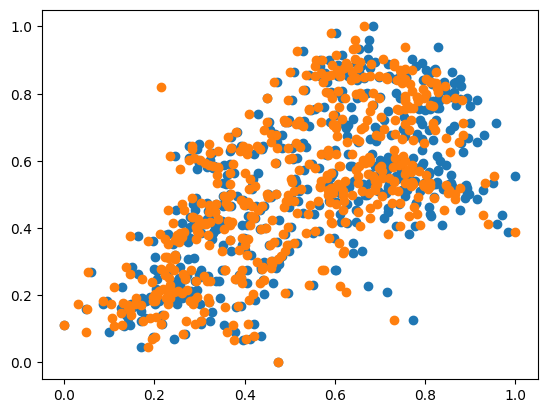

In [137]:
# ploting for all the numeric columns in the dataset
plt.scatter(df_train.temp, df_train.cnt)
plt.scatter(df_train.atemp, df_train.cnt)
#plt.scatter(df_train.yr, df_train.cnt)
plt.show()

We can observer there is a linear relation between Bikes cnt and temp, atemp features

### Dividing into X and Y sets for the model building

In [138]:
# dividing the training dataset into X_train and y_train, where X_train is independent features and y_train is dependent i.e. cnt (bikes count)

y_train = df_train.pop('cnt')
# rest of the data is storing in X_train
X_train = df_train

## Building a linear model

In [139]:
# We have total of 30 columns in the dataset, let's take top 15 columns
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
# Printing the RFE results
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 12),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 5),
 ('mnth_may', False, 3),
 ('mnth_nov', False, 4),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 14),
 ('weekday_wed', False, 10),
 ('weathersit_cloudy', True, 1),
 ('weathersit_drizzle', True, 1)]

In [144]:
# Create col variable with the RFE supported columns/features
col = X_train.columns[rfe.support_]
# printing the columns choosen by RFE
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_cloudy',
       'weathersit_drizzle'],
      dtype='object')

In [145]:
# printing the columns left by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [ ]:
# Function to build a model using statsmodel API - Takes the columns for which the model needs to be built for
def build_model(features):
    X_train_sm = sm.add_constant(X_train[features])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [ ]:
# Function to calculate VIFs and print them - Takes the columns for which VIF to be calcualted as a parameter
def get_vif(features):
    df1 = X_train[features]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF', ascending=False))

## Model 1

In [146]:
# Selected columns for Initial Model 1 - all columns selected by RFE
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          7.31e-192
Time:                        19:35:06   Log-Likelihood:                 518.04
No. Observations:                 511   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -942.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1992      0

Below are the observeration of the Model 1 

Model explains approximately 85% change in cnt

P value of all features are less than 0.05 except for holiday. 

Looking at  VIF values of all features we will remove 'Workingday' that has highest VIF 


## Model 2

In [148]:
# Dropping 'workingday' (one variable at a time)

# Building Model-2 by removing 'workingday' variable
features2 = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_cloudy',
       'weathersit_drizzle']

build_model(features2)
get_vif(features2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          7.31e-192
Time:                        19:44:29   Log-Likelihood:                 518.04
No. Observations:                 511   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -942.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2832      0

P-value of Weekday_sat is high and so can be dropped  

## Model 3

In [149]:
# Dropping 'weekday_sat' (one variable at a time)

# Building Model-3 by removing 'weekday_sat' variable
features3 = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep',  'weekday_sun', 'weathersit_cloudy',
       'weathersit_drizzle']

build_model(features3)
get_vif(features3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          7.13e-193
Time:                        19:49:14   Log-Likelihood:                 517.66
No. Observations:                 511   AIC:                            -1007.
Df Residuals:                     497   BIC:                            -948.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2857      0

Based on the observations of Model 3 , P-values of all features is less than 0.05

'hum' feature has the highest VIF value which can be dropped

## Model 4

In [151]:
# Dropping 'hum' (one variable at a time)

# Building Model-4 by removing 'hum' variable
features4 = ['yr', 'holiday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep',  'weekday_sun', 'weathersit_cloudy',
       'weathersit_drizzle']

build_model(features4)
get_vif(features4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.5
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          5.26e-190
Time:                        19:51:38   Log-Likelihood:                 508.04
No. Observations:                 511   AIC:                            -990.1
Df Residuals:                     498   BIC:                            -935.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2055      0

Below are the high level observations on the above model:
1. P-value: Most of the variables P-value are near 0 except for mnth_jul. Drop mnth_jul
2. VIF: VIF value of all the variables are under 5 and 'temp' being the exception as it is the primary reason for linear relation.

## Model 5

In [152]:
# Dropping 'mnth_jul' (one variable at a time)

# Building Model-5 by removing 'mnth_jul' variable
features5 = ['yr', 'holiday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 
       'mnth_sep',  'weekday_sun', 'weathersit_cloudy',
       'weathersit_drizzle']

build_model(features5)
get_vif(features5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.19e-189
Time:                        19:59:57   Log-Likelihood:                 504.36
No. Observations:                 511   AIC:                            -984.7
Df Residuals:                     499   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1975      0

#### Below are the high level observations on the model:
1. P-value: Most of the variables P-value are near 0 or acceptable range of under 0.05.
2. VIF: VIF value of all the variables are under 5
3. R2 value is 0.84. Hence we consider this as Final model to use further

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [155]:
# Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [156]:
# Build final model with sklearn and columsn with 'features5' list
lr = build_model_sk(X_train[features5],y_train)
print(lr.intercept_,lr.coef_)

0.19749714899899423 [ 0.23450553 -0.10483483  0.47883376 -0.14792835 -0.05400073  0.06242755
  0.09830678  0.08918257 -0.04990837 -0.08135531 -0.29111335]


## Residual analysis of the train data
Find residuals

Plot the residuals using distplot

In [157]:
# Predict the Train data
y_train_pred = lr.predict(X_train[features5])

In [158]:
# Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

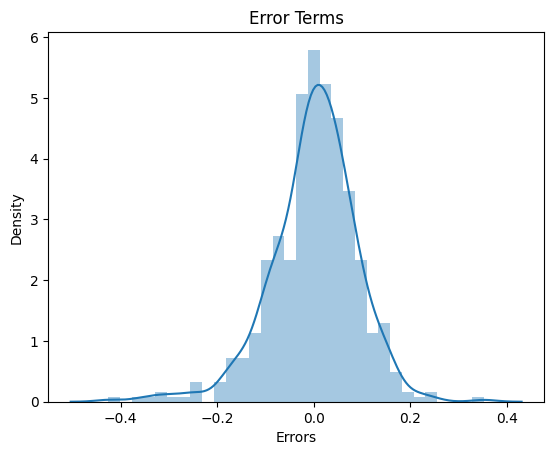

In [159]:
plot_res_dist(y_train, y_train_pred)

 -> Base assumption that the residuals should be normally distributed can be confirmed using above plot.

## R2Score for Train Data

In [160]:
# R2score value for Train data
r2_score(y_train,y_train_pred)

0.8386640092640412

### Prediction and Evaluation on the test set
Feature scaling of the Test data: MinMaxScaling

Add constants

Drop variables that are dropped while building the model

Predict the y values of the test data

Evaluate the R2-score of the test data


In [163]:
# Feature scaling of the Test data: MinMaxScaling
# Test data to be transformed only, no fitting
df_test[['temp', 'atemp', 'hum', 'windspeed', 'cnt']] = scaler.transform(df_test[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])

In [164]:
# Dividing into X and y sets for the testing
y_test = df_test.pop('cnt')
X_test = df_test

In [165]:
print(y_test.shape)
print(X_test.shape)

(219,)
(219, 29)


In [166]:
# Predicting test data values
y_test_pred = lr.predict(X_test[features5])

### Evaluating the model

In [167]:
# Evaluate the R2-score of the test data
r2_score(y_test, y_test_pred)

0.8060781593382021

Text(0, 0.5, 'y_test_pred')

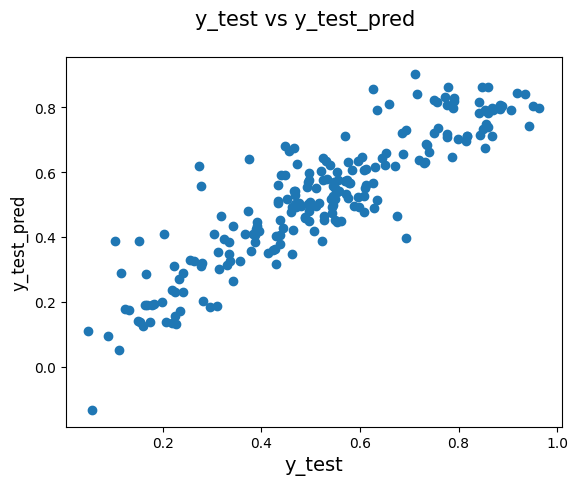

In [168]:
# Plotting scatter plot between y_test and y_test_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_test_pred', fontsize = 12) 

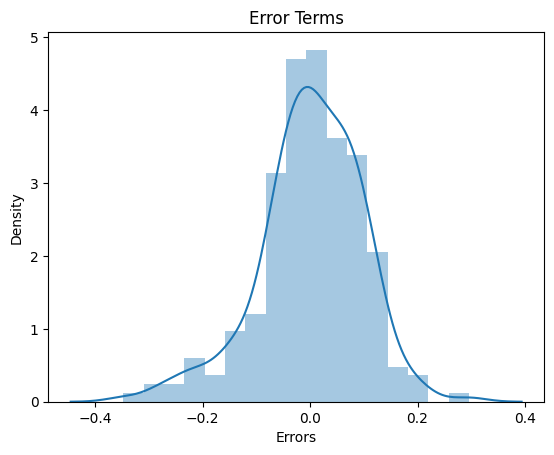

In [169]:
# Residual analysis of Test data
plot_res_dist(y_test, y_test_pred)

### Conclusions from above modelling:
#### Significant features:
1. Year
2. Weather day is a holiday or not
3. Temperature
4. Wind speed
5. Season type
6. Months( September)
7. Weather situation: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

#### Comparison of R2 scores:
1. Train model R2 score is 0.8386
2. Test mode R2 score is   0.8060
3. Difference of 0.0326 is in acceptible range.

#### Residual analysis of Train and Test data
1. Both the plots are normally distributed
2. Both are centered around 0